# Control theory and Vicsek Model - Studying the states of flocks

# Import libraries

In [1]:
# General imports
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from IPython.display import Video, display

In [2]:
# Module imports
import models.vicsek as vicsek
import visualisation as visualisation
import utils
import animation.Animator2D as Animator2D
import animation.MatplotlibAnimator as MatplotlibAnimator

# Launching a simulation 

In [3]:
# Initialize the Vicsek model.
radius = 1
L = 50
N = 300


In [4]:
simulator = vicsek.Vicsek(numberOfParticles=N, domainSize=(L, L), radius=radius)
# Simulate the Vicsek model.
simulationData = simulator.simulate()

# Extract the simulation data.
# time, positions, orientations = simulationData[0], simulationData[1], simulationData[2]

In [5]:
df = utils.simulationDataToDataframe(simulationData)
df.head()

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_295,theta_y_295,theta_x_296,theta_y_296,theta_x_297,theta_y_297,theta_x_298,theta_y_298,theta_x_299,theta_y_299
0,0.0,24.764330,14.457893,43.234415,30.814510,31.972318,26.978730,4.266454,31.974263,49.726612,...,-0.707937,-0.706276,0.984652,0.174526,-0.598924,-0.800806,0.175634,-0.984455,0.065509,-0.997852
1,0.5,24.612704,13.981438,43.043633,31.276682,31.472640,26.960785,4.702126,32.219600,49.547375,...,-0.784324,-0.620351,0.817403,0.576066,-0.438186,-0.898884,-0.167471,-0.985877,0.200730,-0.979647
2,1.0,24.424593,13.518173,42.617097,31.537579,30.978520,26.884330,5.137841,32.464859,49.250671,...,-0.886211,-0.463281,-0.111473,0.993767,-0.497787,-0.867299,-0.476908,-0.878953,0.523058,-0.852297
3,1.5,24.281877,13.038973,42.216070,31.836204,30.492907,27.003410,5.543351,32.757369,48.766776,...,-0.998082,0.061914,0.712118,0.702060,-0.692120,-0.721782,-0.489470,-0.872020,0.499398,-0.866373
4,2.0,24.059322,12.591235,41.987986,32.281151,30.107428,27.321853,6.034057,32.853326,48.362376,...,-0.865334,-0.501196,0.448980,0.893542,-0.953455,-0.301535,-0.061251,-0.998122,0.359878,-0.932999


# Plotting clusters over time 

In [6]:
start = 0 # Start ITERATION
end = 150 # End ITERATION
df2 = df.loc[start:end]
df2.tail()

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_295,theta_y_295,theta_x_296,theta_y_296,theta_x_297,theta_y_297,theta_x_298,theta_y_298,theta_x_299,theta_y_299
146,73.0,8.396229,2.265407,39.865711,17.921902,37.851927,16.728590,15.191047,46.560823,11.046551,...,-0.830532,0.556971,0.963598,0.267355,0.081940,0.996637,0.586681,0.809818,0.426075,-0.904688
147,73.5,8.835913,2.503479,39.370761,17.992790,38.188827,17.098047,15.543847,46.206518,11.395291,...,-0.824642,0.565656,0.990958,0.134176,0.401053,0.916055,0.890879,0.454241,0.264753,-0.964316
148,74.0,9.335596,2.521275,38.888955,18.126442,37.787301,17.396002,15.934571,45.894532,11.626965,...,-0.795390,0.606099,0.937963,0.346736,-0.759802,0.650155,0.821533,0.570161,-0.059497,-0.998228
149,74.5,9.804365,2.695217,38.609024,18.540736,37.399798,17.711979,15.906541,45.395319,11.886153,...,-0.851322,0.524644,0.760622,0.649195,-0.812298,0.583243,0.826623,0.562756,0.309952,-0.950752
150,75.0,10.234574,2.950012,38.454260,19.016181,36.901798,17.756654,16.300180,45.087021,12.206780,...,-0.761476,0.648194,0.946760,0.321940,-0.989700,0.143154,0.684627,0.728893,0.436179,-0.899860


In [7]:
# def clusters_over_time(df, func=utils.periodic_clustering_labels_positions, **kwargs):
#     """
#     Computes the labels of the clusters over time, using the given function. 

#     Parameters:
#     -----------
#     df: pd.DataFrame
#         The dataframe containing the simulation data.
#     func: function
#         The function to use to compute the labels. Must take the dataframe and the iteration as arguments.
#     kwargs: dict
#         The arguments to pass to the function.

#     Returns:
#     --------
#     df_labels: pd.DataFrame
#         The dataframe containing the labels of the clusters over time.
#     """
#     N = (df.shape[1] - 1) // 4 # x,y,v_x,v_y 
#     t = df.shape[0]
#     matLabels = np.zeros((t, N), dtype=int)

#     for i in range(t):
#         # df3 = pd.DataFrame(df.loc[i]).transpose()
#         # labels = utils.periodic_clustering_labels_positions(df, i , k_coef=1.8, L=L, min_samples=5)
#         labels = func(df, i, **kwargs)
#         matLabels[i] = labels

#     # store in dataframe
#     df_labels = pd.DataFrame(matLabels) 
#     return df_labels
df_labels = utils.clusters_over_time(df, k_coef=1.8, L=L, min_samples=5)
df_labels.head()



,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-1,0,1,-1,-1,8,-1,9,-1,2,...,12,-1,9,4,-1,4,-1,14,4,-1
1,-1,6,-1,-1,15,-1,-1,-1,1,0,...,11,-1,9,2,-1,-1,-1,14,2,-1
2,16,0,-1,-1,-1,-1,-1,-1,-1,1,...,11,-1,9,-1,-1,-1,-1,8,2,7
3,-1,0,-1,-1,-1,-1,-1,13,15,1,...,15,-1,-1,22,-1,-1,-1,11,-1,-1
4,-1,0,-1,1,20,-1,-1,-1,2,17,...,2,-1,-1,-1,-1,-1,-1,14,-1,-1


In [ ]:

# save in csv 
df_labels.to_csv('data/labels.csv', index=False)


In [ ]:
from matplotlib import animation 

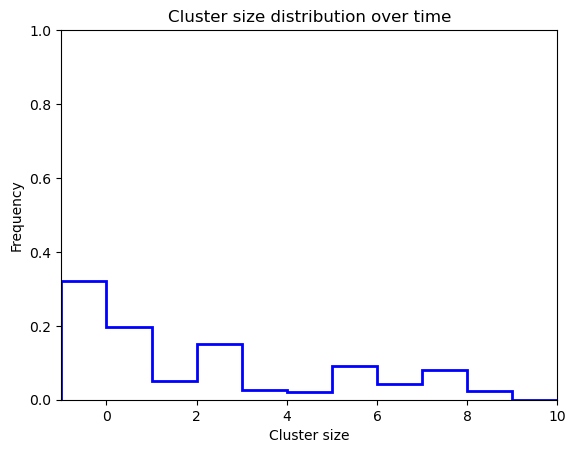

In [ ]:

# pas très intéressant

# HIST_BINS = np.arange(-1, N, 1)
# HIST_RANGE = (-1, N)

# # Animation of the clustering distribution over time
# fig, ax = plt.subplots()
# ax.set_xlim(-1, 10)
# ax.set_ylim(0, 1)
# ax.set_xlabel('Cluster size')
# ax.set_ylabel('Frequency')
# ax.set_title('Cluster size distribution over time')
# ax.hist(matLabels[0], bins=HIST_BINS, range=HIST_RANGE, density=True, histtype='step', color='b', lw=2)

# def animate(i):
#     ax.clear()
#     ax.set_xlim(-1, 10)
#     ax.set_ylim(0, 1)
#     ax.set_xlabel('Cluster size')
#     ax.set_ylabel('Frequency')
#     ax.set_title('Cluster size distribution over time')
#     ax.hist(matLabels[i], bins=HIST_BINS, range=HIST_RANGE, density=True, histtype='step', color='b', lw=2)
#     return ax

# ani = animation.FuncAnimation(fig, animate, frames=t)
# ani.save('cluster_size_distribution.mp4', writer='ffmpeg', fps=10)

## Cluster of bird over time 

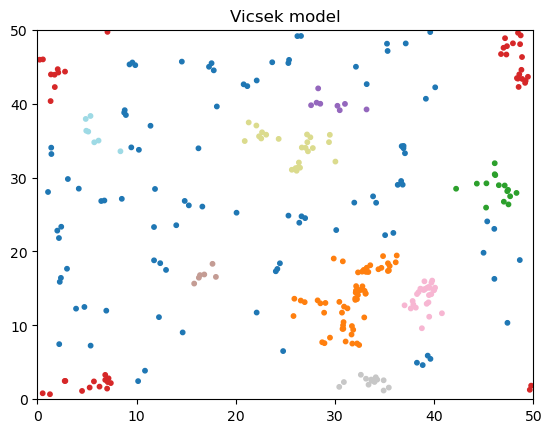

In [ ]:
time, positions, orientations = simulationData[0], simulationData[1], simulationData[2]
# plot simulation 
fig, ax = plt.subplots()

def animate(i):
    x, y = positions[i, :, 0], positions[i, :, 1]
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_title('Vicsek model')

    ax.scatter(x, y, c=matLabels[i], cmap='tab20', s=10)
    return ax

ani = animation.FuncAnimation(fig, animate, frames=t)
ani.save('data/vicsek_model_normal.mp4', writer='ffmpeg', fps=20)

In [ ]:
# Alphanumeric heuristic # 
def permute(line): 

    max = int(np.max(line))
    min = int(np.min(line)) 
    UNVISITED = -2
    permutation = np.zeros((max-min+1)) + UNVISITED
    for i in range(len(line)): 
        if permutation[int(line[i]-min)] == UNVISITED:
            permutation[int(line[i]-min)] = line[i]
        else :
            line[i] = permutation[int(line[i]-min)]
    return line



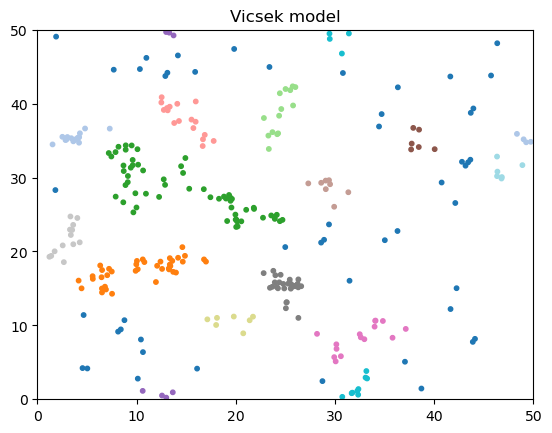

In [ ]:
time, positions, orientations = simulationData[0], simulationData[1], simulationData[2]
# plot simulation 
fig, ax = plt.subplots()
matLabels = df_labels.to_numpy()
def animate(i):
    x, y = positions[i, :, 0], positions[i, :, 1]
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_title('Vicsek model')
    col = permute(matLabels[i])
    ax.scatter(x, y, c=col, cmap='tab20', s=10)
    return ax

ani = animation.FuncAnimation(fig, animate, frames=end-start)
ani.save('data/vicsek_model_alphanum.mp4', writer='ffmpeg', fps=20)

22
22


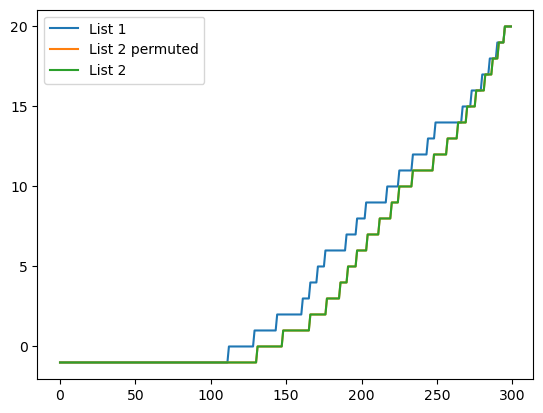

In [ ]:
import numpy as np
from scipy.optimize import linear_sum_assignment

def minimize_difference_with_ignore(list1, list2, ignore_value=-1):
    # Convertir les listes en tableaux numpy
    list1 = np.array(list1)
    list2 = np.array(list2)
    
    # Trouver les indices des éléments à ignorer
    valid_indices = (list1 != ignore_value) & (list2 != ignore_value)
    
    # Extraire les éléments valides
    list1_valid = list1[valid_indices]
    list2_valid = list2[valid_indices]
    
    # Calculer la matrice de coût pour les éléments valides
    cost_matrix = np.abs(list1_valid[:, np.newaxis] - list2_valid[np.newaxis, :])
    
    # Trouver l'affectation optimale utilisant l'algorithme hongrois
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    
    # Appliquer la permutation optimale aux éléments valides de list2
    list2_permuted_valid = list2_valid[col_ind]
    
    # Reconstituer la liste permutée en réintégrant les valeurs ignorées
    list2_permuted = np.copy(list2)
    list2_permuted[valid_indices] = list2_permuted_valid
    
    return list2_permuted, col_ind

# Exemple d'utilisation
list1 = matLabels[0].astype(int)
list2 = matLabels[1].astype(int)

print(len(set(list1)))
print(len(set(list2)))

list2_permuted, permutation_indices = minimize_difference_with_ignore(list1, list2)
# print("List1:", list1)
# print("List2:", list2)
# print("List2 permuted:", list2_permuted)
# print("Permutation indices:", permutation_indices)

fig, ax = plt.subplots()
ax.plot(np.sort(list1), label='List 1')
ax.plot(np.sort(list2_permuted), label='List 2 permuted')
ax.plot(np.sort(list2), label='List 2')
ax.legend()
plt.show()
